In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from astropy import units as u
from astropy import coordinates as coords
# from astroquery.simbad import Simbad
import astroquery
plt.style.use("fivethirtyeight")

from astropy.table import Table

In [2]:
import gwb

In [8]:
import sys
sys.path.append("../")

from groupten import read_mist_models

In [3]:
tgas = gwb.TGASData("/Users/semyeong/data/gaia/tgas_source/stacked_tgas.fits")

In [4]:
df = pd.read_csv("../data/targets.csv")
print(len(df))

45


In [5]:
df.head(3)

,tgas_row,tgas_ra,tgas_dec,tgas_distance,gx,gy,gz,tgas_glon,tgas_glat,tgas_gmag,hip,tyc,hip_tyc_id,source_id,tmass_j
0,382720,204.863461,61.061727,102.407820,-22.697253,53.998667,84.002025,112.798467,55.111792,11.724152,NaN,b'4164-274-1',TYC 4164-274-1,1662855584317183744,10.187
1,357377,210.589752,52.417741,94.271430,-7.874400,44.365174,82.805964,100.064644,61.447334,10.153631,NaN,b'3471-333-1',TYC 3471-333-1,1512773174838690176,9.033
2,368772,223.270036,51.261152,102.577721,2.282405,56.244648,85.752662,87.676213,56.717754,9.766224,NaN,b'3480-1209-1',TYC 3480-1209-1,1593570580647402880,8.797


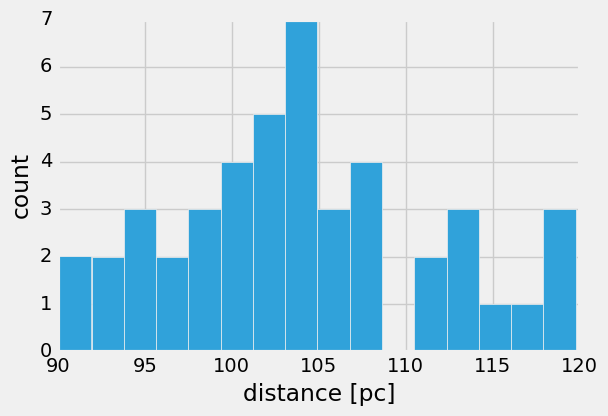

In [11]:
plt.hist(df.tgas_distance, 16);
plt.xlabel("distance [pc]");
plt.ylabel("count")

In [16]:
df['gj'] = df['tgas_gmag'] - df['tmass_j']
df['gMag'] = df['tgas_gmag'] - 5*(np.log10(df['tgas_distance'])-1)

In [17]:
parsec_2MASS = Table.read("../data/parsec_2MASSJHKs.dat",
                    format='ascii.commented_header', header_start=5)
parsec_Gaia = Table.read("../data/parsec_Gaia.dat",
                    format='ascii.commented_header', header_start=5)

In [170]:
print(len(parsec_2MASS), len(parsec_Gaia))

29427 29427


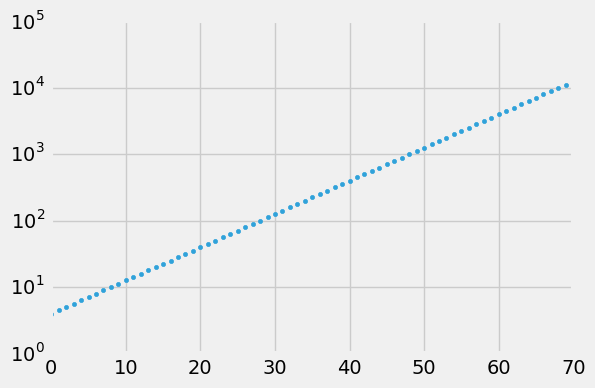

In [182]:
plt.plot(np.unique(parsec_2MASS['Age'])/1e6, '.')
plt.yscale('log')

In [19]:
ages = np.unique(parsec_2MASS['Age'])
print(len(ages))

71


In [36]:
df.columns

Index(['tgas_row', 'tgas_ra', 'tgas_dec', 'tgas_distance', 'gx', 'gy', 'gz',
       'tgas_glon', 'tgas_glat', 'tgas_gmag', 'hip', 'tyc', 'hip_tyc_id',
       'source_id', 'tmass_j', 'gj', 'gMag'],
      dtype='object')

In [41]:
df['tgas_gmag'].min()

5.649431483337513

(-1, 2)

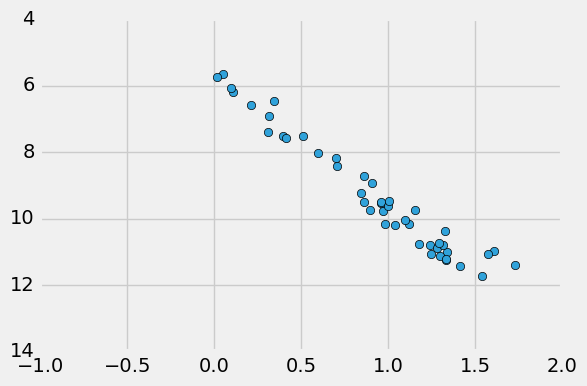

In [40]:
plt.plot(df['gj'], df['tgas_gmag'], 'o')
plt.ylim(14,4)
plt.xlim(-1,2)

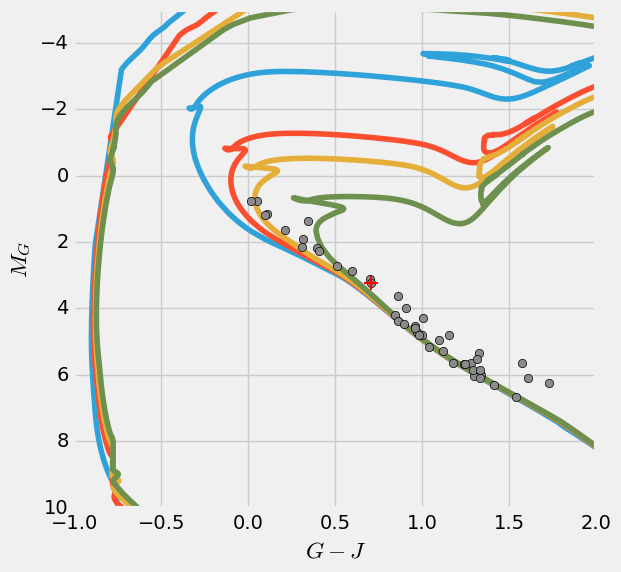

In [34]:
plt.figure(figsize=(6,6))

# parsec_gj = parsec_Gaia['Gmag'] - parsec_2MASS['Jmag']
# for i, age in enumerate(ages[::10]):
#     cond = parsec_2MASS['Age']==age
#     plt.plot(parsec_gj[cond], parsec_Gaia['Gmag'][cond], '-', color=plt.cm.Blues_r(i/10.),
#              label='{:.1f}'.format(age/1e6))
# #     plt.plot(parsec_gj[cond], parsec_2MASS['Jmag'][cond], '.', color=plt.cm.plasma(i/10.))
#     plot_gjg(np.log10(age))

plot_gjg(8)
plot_gjg(np.log10(3e8))
plot_gjg(np.log10(5e8))
plot_gjg(9)

# plt.legend(loc='lower left', numpoints=1)

plt.plot(df['gj'], df['gMag'], 'o')
plt.gca().invert_yaxis()
plt.xlabel('$G-J$')
plt.ylabel('$M_G$')
plt.xlim(-1,2)
plt.ylim(10,-5)

# for row in df.itertuples():
#     plt.text(row.gj, row.gMag, row.hip_tyc_id, rotation=45,
#              ha='left' if row.Index%2==0 else 'right',
#              va='bottom' if row.Index%2==0 else 'top')

select = df.loc[df.hip_tyc_id == 'HIP 69721']
plt.plot(select.gj, select.gMag, 'r+', ms=10, mew=1.5)

In [9]:
isocmd = read_mist_models.ISOCMD('../data/MIST_iso_1490194647.iso.cmd')

Reading in: ../data/MIST_iso_1490194647.iso.cmd


In [10]:
print('available columns: ', isocmd.hdr_list)

available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G', 'Gaia_BP', 'Gaia_RP', 'phase']


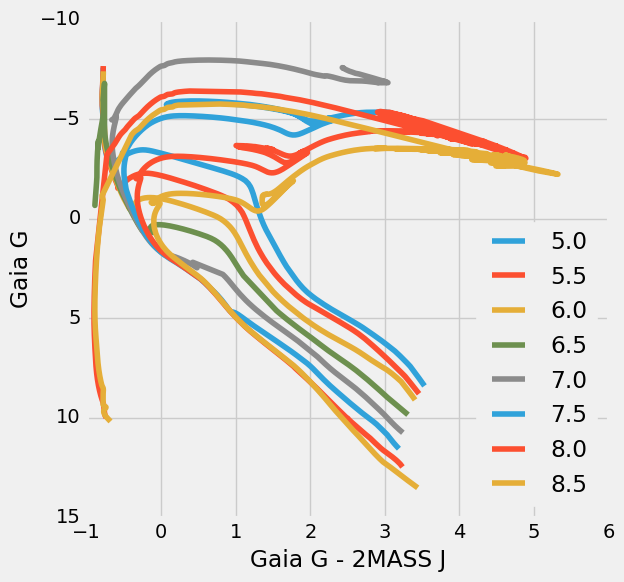

In [14]:
def plot_gjg(age):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    B = isocmd.isocmds[age_ind]['Gaia_G']
    V = isocmd.isocmds[age_ind]['2MASS_J']
    plt.plot(B-V, B, label='{:.1f}'.format(age))

plt.figure(figsize=(6,6))
plt.xlabel('Gaia G - 2MASS J')
plt.ylabel('Gaia G')
# plt.axis([-2.0, 6.0, 18, -10])
plt.gca().invert_yaxis()
for age in np.arange(5,9,.5):
    plot_gjg(age)
plt.legend(loc='lower right')

In [110]:
dfBib.loc[dfBib.hip_tyc_id == 'HIP 67005']

,bibcode,journal,title,year,volume,doi,hip_tyc_id
205,b'2015ApJ...804..146D',b'ApJ',b'The ages of early-type stars: Stromgren phot...,2015.0,804.0,b'10.1088/0004-637X/804/2/146',HIP 67005
206,b'2015A&A...580A..23P',b'A&A',b'A new catalogue of Stroemgren-Crawford uvby{...,2015.0,580.0,b'10.1051/0004-6361/201526413',HIP 67005
207,b'2013ApJ...775..115U',b'ApJ',b'The inner kiloparsec of Mrk 273 with Keck ad...,2013.0,775.0,b'10.1088/0004-637X/775/2/115',HIP 67005
208,b'2012AstL...38..694G',b'AstL',b'Spatial distribution and kinematics of OB st...,2012.0,38.0,b'10.1134/S1063773712110035',HIP 67005
209,b'2012A&A...546A..61D',b'A&A',b'Radial velocities for the HIPPARCOS-Gaia Hun...,2012.0,546.0,b'10.1051/0004-6361/201219219',HIP 67005
210,b'2012A&A...537A.120Z',b'A&A',b'Rotational velocities of A-type stars. IV. E...,2012.0,537.0,b'10.1051/0004-6361/201117691',HIP 67005
211,b'2012MNRAS.427..343M',b'MNRAS',b'Fundamental parameters and infrared excesses...,2012.0,427.0,b'10.1111/j.1365-2966.2012.21873.x',HIP 67005
212,b'2011SerAJ.182...35D',b'SerAJ',b'Corrected {mu}delta for stars of Hipparcos c...,2011.0,182.0,b'10.2298/SAJ1182035D',HIP 67005
213,b'2011ApJS..197...19K',b'ApJS',b'The first hundred brown dwarfs discovered by...,2011.0,197.0,b'10.1088/0067-0049/197/2/19',HIP 67005
214,b'2009ApJS..185..289R',b'ApJS',b'The infrared telescope facility (IRTF) spect...,2009.0,185.0,b'10.1088/0067-0049/185/2/289',HIP 67005


mean position gx, gy, gz = -5.2 59.0 84.1
mean distance = 103.9


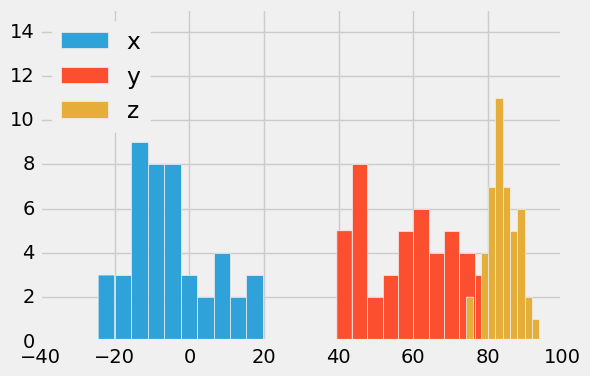

In [125]:
plt.hist(df.gx, label='x');
plt.hist(df.gy, label='y');
plt.hist(df.gz, label='z');
plt.legend(loc='upper left',);
plt.ylim(0,15)
print("mean position gx, gy, gz = {:.1f} {:.1f} {:.1f}".format(
    df.gx.mean(), df.gy.mean(), df.gz.mean()))
print("mean distance = {:.1f}".format(
    np.sqrt(df.gx**2+df.gy**2+df.gz**2).mean()))